## Notes

for new data(not trained on dataset)-when model sees object partially cut off,the model will give wrong prediction,with less accuracy,that's why we need augmentation.
Common techniques:
1.Horizontal/vertical flip
2.

## Task

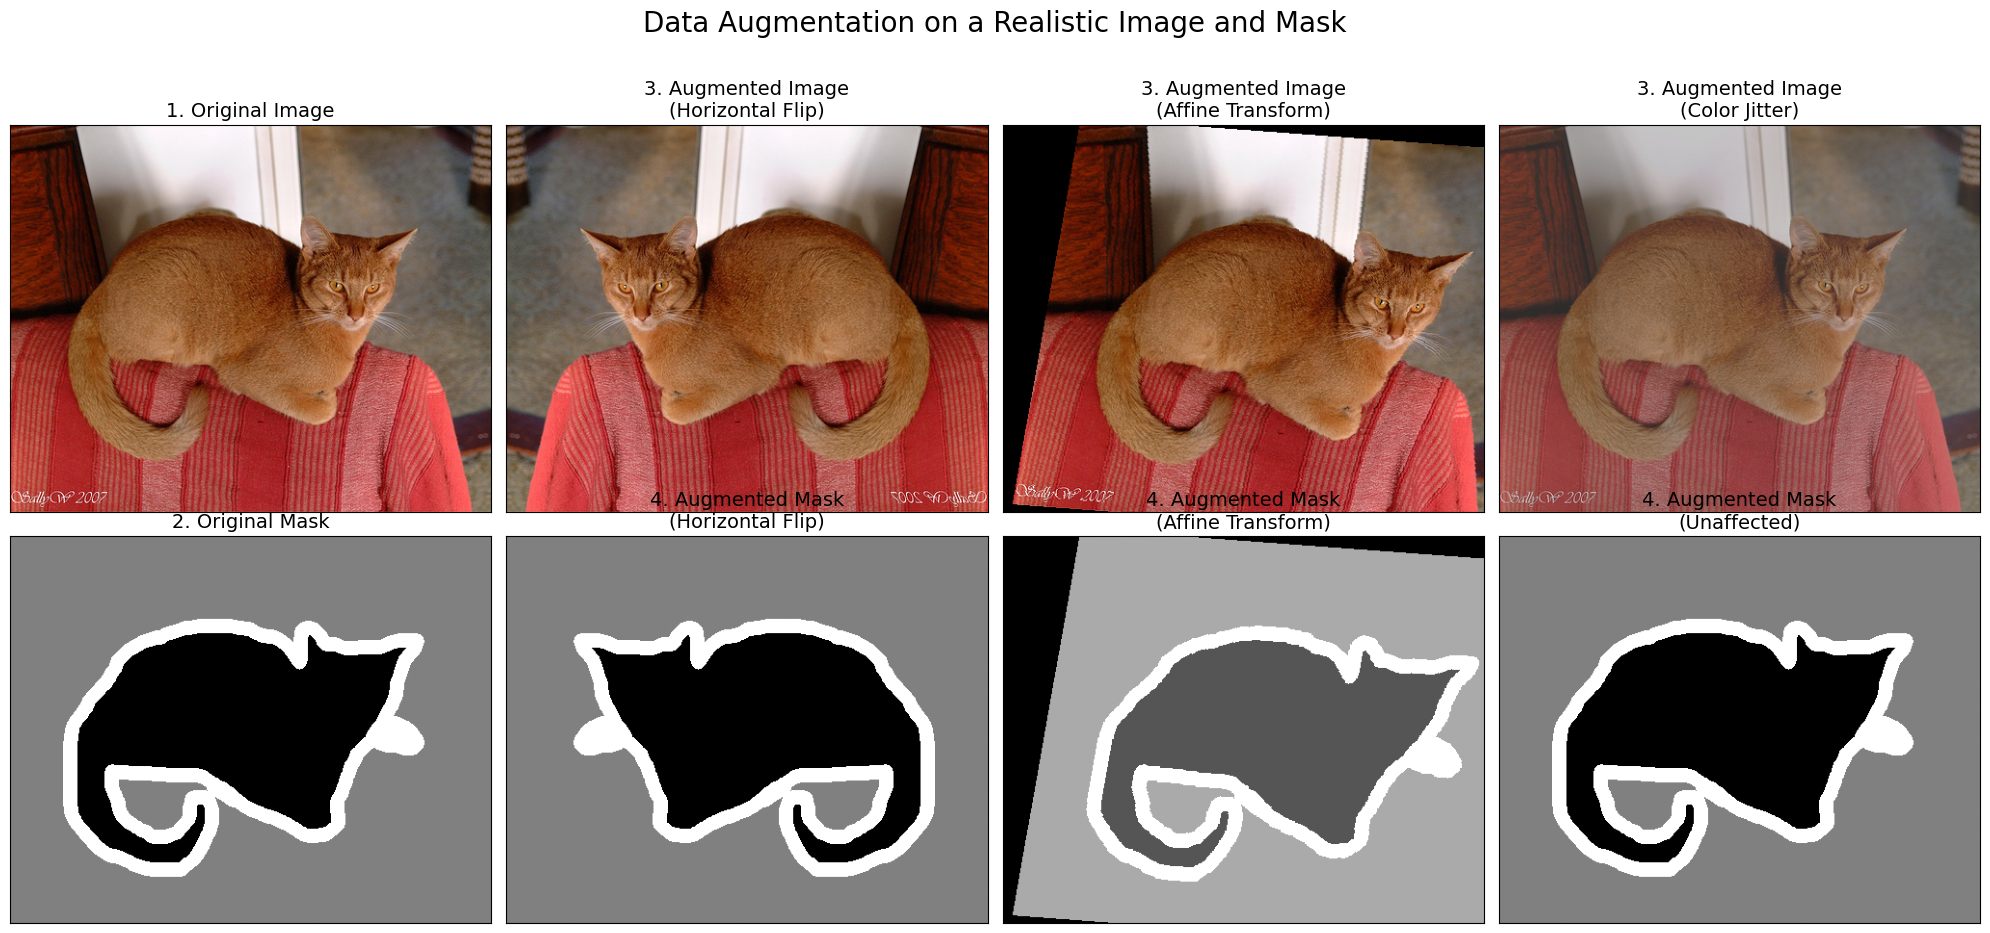

In [10]:
import torch
from torchvision.transforms import v2 as T
from torchvision.datasets import OxfordIIITPet
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# --- 1. Load a Realistic Image and Mask from a Real Dataset ---
# NOTE: The first time you run this, it will download the dataset (~800 MB).
# It will NOT download it again on subsequent runs.
try:
    # Load the dataset. We only need one image, so we can just index into it.
    pet_dataset = OxfordIIITPet(root="./data", download=False, target_types="segmentation")
    # Let's grab a specific, good-looking image from the dataset
    original_image, original_mask = pet_dataset[12]
except Exception as e:
    print(f"Failed to load dataset: {e}")
    print("Please ensure you have an internet connection for the first-time download.")
    exit()

# --- 2. Define Augmentation Techniques ---
# Technique 1: A simple horizontal flip
h_flip = T.RandomHorizontalFlip(p=1.0) # p=1.0 to always apply for this demo

# Technique 2: A more complex spatial transformation
affine_transform = T.RandomAffine(degrees=20, translate=(0.1, 0.1), scale=(0.9, 1.1), shear=10)

# Technique 3: A color-only transformation
color_jitter = T.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.4)

# --- 3. Apply the Augmentations ---
# Apply spatial augmentations (these must affect both image and mask identically)
aug_hflip_img, aug_hflip_mask = h_flip(original_image, original_mask)
aug_affine_img, aug_affine_mask = affine_transform(original_image, original_mask)

# Apply color augmentation (this only affects the image)
aug_jitter_img = color_jitter(original_image)
# The mask for the color jitter is just the original mask, as its shape is unchanged
aug_jitter_mask = original_mask

# --- 4. Display the results in the requested grid format ---
# We will create a 2x4 grid to show the original plus the three augmentations
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
fig.suptitle("Data Augmentation on a Realistic Image and Mask", fontsize=20)

# Column 1: Original
axes[0, 0].imshow(original_image)
axes[0, 0].set_title("1. Original Image", fontsize=14)
axes[1, 0].imshow(original_mask, cmap='gray')
axes[1, 0].set_title("2. Original Mask", fontsize=14)

# Column 2: Horizontal Flip
axes[0, 1].imshow(aug_hflip_img)
axes[0, 1].set_title("3. Augmented Image\n(Horizontal Flip)", fontsize=14)
axes[1, 1].imshow(aug_hflip_mask, cmap='gray')
axes[1, 1].set_title("4. Augmented Mask\n(Horizontal Flip)", fontsize=14)

# Column 3: Affine Transform
axes[0, 2].imshow(aug_affine_img)
axes[0, 2].set_title("3. Augmented Image\n(Affine Transform)", fontsize=14)
axes[1, 2].imshow(aug_affine_mask, cmap='gray')
axes[1, 2].set_title("4. Augmented Mask\n(Affine Transform)", fontsize=14)

# Column 4: Color Jitter
axes[0, 3].imshow(aug_jitter_img)
axes[0, 3].set_title("3. Augmented Image\n(Color Jitter)", fontsize=14)
axes[1, 3].imshow(aug_jitter_mask, cmap='gray')
axes[1, 3].set_title("4. Augmented Mask\n(Unaffected)", fontsize=14)

# Clean up all axes
for ax_row in axes:
    for ax in ax_row:
        ax.set_xticks([])
        ax.set_yticks([])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()